# Grafo causal

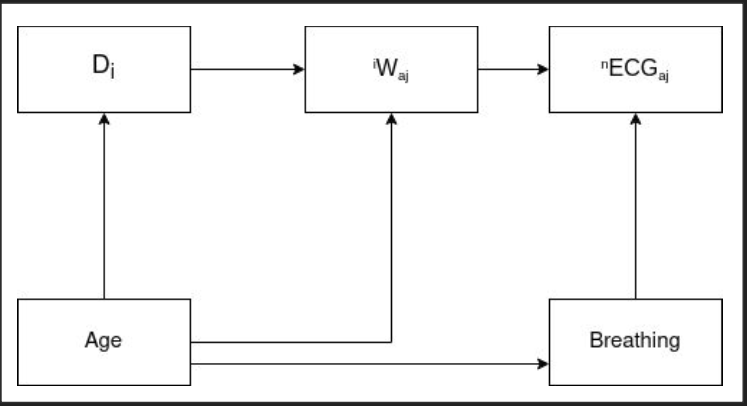

# Inicialização

In [23]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [3]:
# Leitura da base
base = np.load('db_crude.npy')
base

array([[ 7.80000000e+01,  0.00000000e+00,  1.00000000e+00, ...,
         7.48177628e-04, -1.35298847e-01,  1.26984581e-02],
       [ 7.80000000e+01,  0.00000000e+00,  1.00000000e+00, ...,
         1.01221479e-02, -9.35408634e-02, -1.68326333e-02],
       [ 7.80000000e+01,  0.00000000e+00,  1.00000000e+00, ...,
        -8.51819290e-02, -3.37815623e-03, -2.61304157e-02],
       ...,
       [ 8.50000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
         9.16118853e-02, -1.33931292e-01, -9.53066237e-02],
       [ 8.50000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
        -1.25963947e-02, -1.49758624e-01,  3.21203677e-03],
       [ 8.50000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
         6.61947557e-02, -1.52033060e-01,  6.13461198e-02]])

In [4]:
data = pd.DataFrame(data=base)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,78.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.000000,0.0,...,-0.102592,0.077092,-0.085197,-0.002399,-0.140835,-0.031682,-0.157457,0.000748,-0.135299,0.012698
1,78.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.873972,0.0,...,-0.119320,0.042212,-0.064489,0.018866,-0.091524,-0.000729,-0.083314,0.010122,-0.093541,-0.016833
2,78.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.773239,0.0,...,-0.032861,-0.031866,-0.000156,-0.006325,0.018967,0.005566,-0.036312,-0.085182,-0.003378,-0.026130
3,78.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,1.350993,0.0,...,-0.027463,-0.001140,-0.047255,0.044364,0.020192,-0.024986,-0.035386,0.004214,0.009963,-0.018035
4,78.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.013831,0.0,...,-0.016021,0.026329,-0.048829,-0.005043,-0.056160,0.108080,-0.032514,0.030724,-0.102817,0.005999


# Definição de uma função de regressão

In [24]:
def regression(X,y):
    logistic_regression = LogisticRegression(random_state=0)
    cv_results = cross_validate(logistic_regression, X, y, cv=5, return_estimator=True)
    return cv_results

# Cálculo do efeito AGE -> D

### Backdoor-path 1: AGE -> W <- D
Bloqueado pelo collider W

### Backdoor-path 2: AGE -> Breathing -> ECG <- W <- D
Bloqueado pelo collider ECG

In [25]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,1]
teste = regression(X,y)
teste.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score'])

In [30]:
for i in teste['estimator']:
    print(i.coef_)

[[0.03364731]]
[[0.03382543]]
[[0.03373277]]
[[0.03247126]]
[[0.03299872]]


In [9]:
# Cálculo do efeito Age -> 1dAvb
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,1]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.01943625584236841
[0.00176416]


In [15]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.9320893665721252
[[0.03333257]]


In [10]:
# Cálculo do efeito Age -> RBBB
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,2]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.030633328694426032
[0.00289992]


In [16]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,2]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.8761390588976796
[[0.0310329]]


In [11]:
# Cálculo do efeito Age -> LBBB
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,3]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.030940008386238782
[0.00213886]


In [17]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,3]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.9376656549070342
[[0.04899045]]


In [12]:
# Cálculo do efeito Age -> SB
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,4]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.0008080234101326411
[-0.00031078]


In [18]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,4]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.9502778192433364
[[-0.00644942]]


In [13]:
# Cálculo do efeito Age -> ST
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,5]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.013847645287370258
[-0.00206851]


In [19]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,5]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.8575707817087127
[[-0.01649184]]


In [14]:
# Cálculo do efeito Age -> AF
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,6]
# Aplicação da regressão linear
reg = LinearRegression().fit(X, y)
print(reg.score(X,y))
print(reg.coef_)

0.06785215212215157
[0.00400582]


In [20]:
X = np.array(data.iloc[:,0]).reshape(-1,1) 
y = data.iloc[:,6]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.score(X,y))
print(clf.coef_)

0.8956179197558508
[[0.0619571]]


In [ ]:
# Cálculo do efeito D -> W
# Backdoor-path 1: D <- AGE -> W: fazer condicionamento do fork em AGE
# Backdoor-path 2: D <- AGE -> Breathing -> ECG <- W: bloqueado pelo collider ECG

In [ ]:
# Cálculo do efeito AGE -> W
# Backdoor-path 1: AGE -> D -> W: fazer condicionamento da chain em D
# Backdoor-path 2: AGE -> Breathing -> ECG <- W: bloqueado pelo collider ECG

In [ ]:
# Cálculo do efeito W -> ECG
# Backdoor-path 1: W <- D <- AGE -> Breathing -> ECG
# Backdoor-path 2: W <- AGE -> Breathing -> ECG
# Condicionamento do fork em AGE bloqueia ambos os caminhos

In [ ]:
# Cálculo do efeito AGE -> Breathing
# Backdoor-path 1: AGE -> D -> W -> ECG <- Breathing: bloqueado pelo collider ECG
# Backdoor-path 2: AGE -> W -> ECG <- Breathing: bloqueado pelo collider ECG

In [ ]:
# Cálculo do efeito Breathing -> ECG
# Backdoor-path 1: Breathing <- AGE -> W -> ECG